In [1]:
from PIL import Image

In [27]:
import cv2
import pytesseract
import numpy as np

In [9]:
import matplotlib.pyplot as plt

In [52]:
image=cv2.imread('timetable.png')

In [19]:
print(image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


### OpenCV loads image in BGR format
### Matplotliv expects in RGB format
- Open CV represents image as numpy arrays with values in range [0,255]


In [5]:
print(image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [7]:
img_bgr=image

In [8]:
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

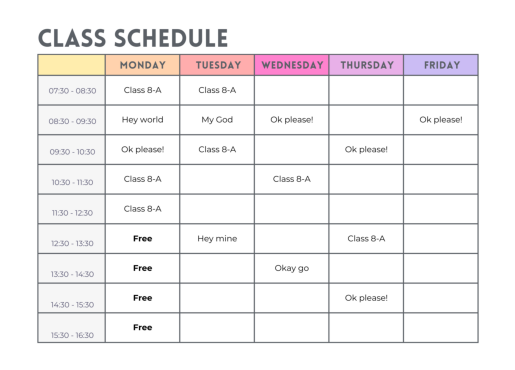

In [10]:
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [21]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


In [31]:
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

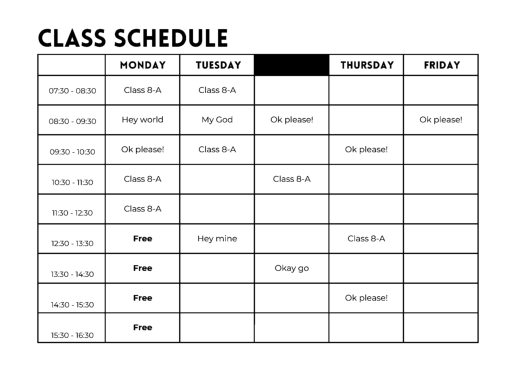

In [32]:
plt.imshow(gray, cmap='gray')  
plt.axis('off')  
plt.show()

In [37]:
import easyocr

ModuleNotFoundError: No module named 'easyocr'

In [33]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"


In [36]:
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(image, config=custom_config)
print(text)

SCHEDUL!
CLASS SCHEDULE
[| _monpay FRIDAY
UL
08:30 - 09:30 Hey world | My God Ok please! Ok please!
| LE Lf} Ly HH
09:30 - 10:30 Ok please! Class 8-A Ok please!
pF
10:30 - 11:30 Class 8-A Class 8-A
|
11:30 - 12:30 Class 8-A
1430 - (630



In [51]:
# Get bounding boxes of detected words
data = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT)

# Draw boxes around detected words
for i in range(len(data["text"])):
    if int(data["conf"][i]) > 50:  # Confidence threshold
        x, y, w, h = data["left"][i], data["top"][i], data["width"][i], data["height"][i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Save and display image with boxes
cv2.imwrite("boxed_text.png", image)
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [38]:
import easyocr

In [39]:
reader=easyocr.Reader(['en'])
results=reader.readtext('timetable.png')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [42]:
results=reader.readtext('timetable.png')

In [43]:
print(results)

[([[108, 68], [888, 68], [888, 164], [108, 164]], 'CLASS SCHEDULE', 0.8715275951633482), ([[441, 205], [631, 205], [631, 247], [441, 247]], 'MONDAY', 0.9998571600954176), ([[744, 205], [934, 205], [934, 247], [744, 247]], 'TUESDAY', 0.9993282192218443), ([[1013, 205], [1267, 205], [1267, 247], [1013, 247]], 'WEDNESDAY', 0.9996016820966892), ([[1329, 203], [1551, 203], [1551, 247], [1329, 247]], 'THURSDAY', 0.9989705965969554), ([[1667, 205], [1819, 205], [1819, 247], [1667, 247]], 'FRIDAY', 0.9997733520609499), ([[154, 314], [244, 314], [244, 346], [154, 346]], '07.30', 0.7277927554741799), ([[262, 314], [352, 314], [352, 346], [262, 346]], '08.30', 0.9456084858179704), ([[457, 309], [613, 309], [613, 345], [457, 345]], 'Class 8-A', 0.8149263410055492), ([[757, 309], [913, 309], [913, 345], [757, 345]], 'Class 8-A', 0.9367667878477727), ([[154, 438], [244, 438], [244, 470], [154, 470]], '08.30', 0.9990703147009828), ([[264, 438], [352, 438], [352, 470], [264, 470]], '09.30', 0.71891264

In [53]:
for (bbox, text, prob) in results:
    print(bbox)
    top_left=tuple(map(int,bbox[0]))
    bottom_right=tuple(map(int,bbox[2]))
    cv2.rectangle(image,top_left,bottom_right,(0,255,0),2)
    cv2.putText(image,text,(top_left[0],top_left[1]-10),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

# cv2.imshow("OCR Result",image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

[[108, 68], [888, 68], [888, 164], [108, 164]]
[[441, 205], [631, 205], [631, 247], [441, 247]]
[[744, 205], [934, 205], [934, 247], [744, 247]]
[[1013, 205], [1267, 205], [1267, 247], [1013, 247]]
[[1329, 203], [1551, 203], [1551, 247], [1329, 247]]
[[1667, 205], [1819, 205], [1819, 247], [1667, 247]]
[[154, 314], [244, 314], [244, 346], [154, 346]]
[[262, 314], [352, 314], [352, 346], [262, 346]]
[[457, 309], [613, 309], [613, 345], [457, 345]]
[[757, 309], [913, 309], [913, 345], [757, 345]]
[[154, 438], [244, 438], [244, 470], [154, 470]]
[[264, 438], [352, 438], [352, 470], [264, 470]]
[[522, 427], [622, 427], [622, 465], [522, 465]]
[[827, 426], [904, 426], [904, 465], [827, 465]]
[[1046, 421], [1231, 421], [1231, 473], [1046, 473]]
[[1648, 421], [1831, 421], [1831, 473], [1648, 473]]
[[158, 560], [248, 560], [248, 592], [158, 592]]
[[264, 560], [348, 560], [348, 592], [264, 592]]
[[447, 549], [627, 549], [627, 589], [447, 589]]
[[757, 549], [915, 549], [915, 585], [757, 585]]
[[

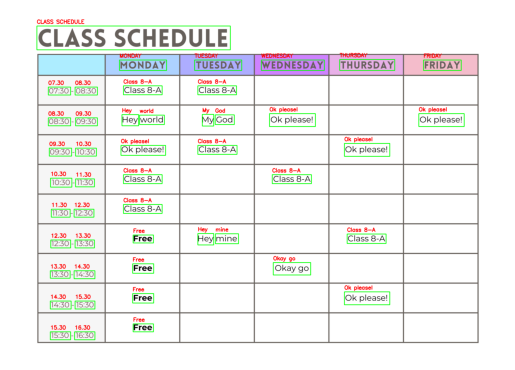

In [55]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import os
from PIL import Image
with Image.open("timetable.png") as img:
    img.show()

In [2]:
import cv2
img=cv2.imread('timetable.png')

In [6]:
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

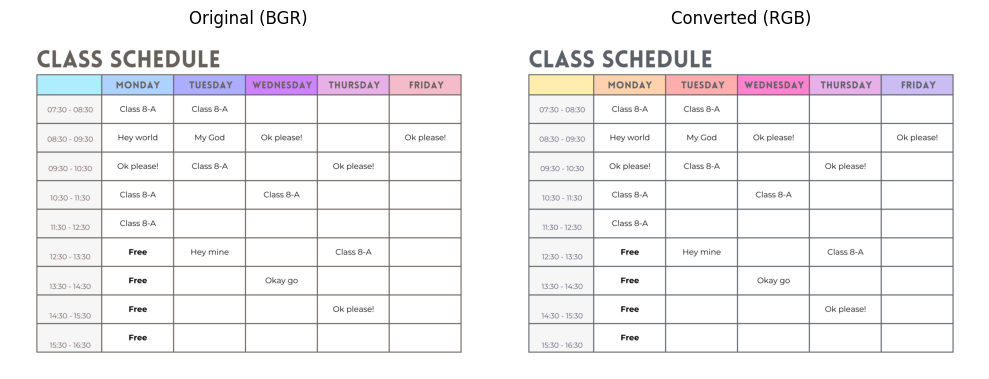

In [11]:
plt.figure(figsize=(10, 5))

# BGR image (will show incorrect colors in matplotlib)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original (BGR)')
plt.axis('off')

# RGB image (correct colors)
plt.subplot(1, 2, 2)
plt.imshow(img_rgb)
plt.title('Converted (RGB)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
img_path='timetable.png'
if os.path.exists(img_path):
    print('OK')

OK


In [13]:
import easyocr

In [15]:
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [16]:
result=reader.readtext(img_path)

In [17]:
for(bbox,text,prob) in result:
    print(f'Text: {text}, Probability: {prob}')

Text: CLASS SCHEDULE, Probability: 0.8715275951633482
Text: MONDAY, Probability: 0.9998571600954176
Text: TUESDAY, Probability: 0.9993282192218443
Text: WEDNESDAY, Probability: 0.9996016820966892
Text: THURSDAY, Probability: 0.9989705965969554
Text: FRIDAY, Probability: 0.9997733520609499
Text: 07.30, Probability: 0.7277927554741799
Text: 08.30, Probability: 0.9456084858179704
Text: Class 8-A, Probability: 0.8149263410055492
Text: Class 8-A, Probability: 0.9367667878477727
Text: 08.30, Probability: 0.9990703147009828
Text: 09.30, Probability: 0.7189126457070287
Text: world, Probability: 0.9990360105982387
Text: God, Probability: 0.9072861075401306
Text: Ok pleasel, Probability: 0.9986650735237456
Text: Ok pleasel, Probability: 0.9730879625469618
Text: 09.30, Probability: 0.9467377426518585
Text: 10.30, Probability: 0.9918692928744124
Text: Ok pleasel, Probability: 0.9835141310180393
Text: Class 8-A, Probability: 0.926335276573586
Text: Ok pleasel, Probability: 0.9960960333223708
Text: 

In [34]:
for(bbox,text,prob) in result:
    pts = [tuple(point) for point in bbox]
    print(pts)
    # print("The coordinates are",bbox)
    # print(text)

[(108, 68), (888, 68), (888, 164), (108, 164)]
[(441, 205), (631, 205), (631, 247), (441, 247)]
[(744, 205), (934, 205), (934, 247), (744, 247)]
[(1013, 205), (1267, 205), (1267, 247), (1013, 247)]
[(1329, 203), (1551, 203), (1551, 247), (1329, 247)]
[(1667, 205), (1819, 205), (1819, 247), (1667, 247)]
[(154, 314), (244, 314), (244, 346), (154, 346)]
[(262, 314), (352, 314), (352, 346), (262, 346)]
[(457, 309), (613, 309), (613, 345), (457, 345)]
[(757, 309), (913, 309), (913, 345), (757, 345)]
[(154, 438), (244, 438), (244, 470), (154, 470)]
[(264, 438), (352, 438), (352, 470), (264, 470)]
[(522, 427), (622, 427), (622, 465), (522, 465)]
[(827, 426), (904, 426), (904, 465), (827, 465)]
[(1046, 421), (1231, 421), (1231, 473), (1046, 473)]
[(1648, 421), (1831, 421), (1831, 473), (1648, 473)]
[(158, 560), (248, 560), (248, 592), (158, 592)]
[(264, 560), (348, 560), (348, 592), (264, 592)]
[(447, 549), (627, 549), (627, 589), (447, 589)]
[(757, 549), (915, 549), (915, 585), (757, 585)]
[(

In [21]:
from PIL import Image, ImageDraw, ImageFont

In [22]:
img_pil=Image.fromarray(img_rgb)
draw=ImageDraw.Draw(img_pil)

In [26]:
try:

    font = ImageFont.truetype("arial.ttf", 14)
    print("The font set to arial.ttf")
except:
    font = ImageFont.load_default()
    print("Sorry set to default")

The font set to arial.ttf


In [39]:
results=result

In [35]:
results.sort(key=lambda r: (r[0][0][1], r[0][0][0]))


In [40]:
for res in results:
    print(res)

([[108, 68], [888, 68], [888, 164], [108, 164]], 'CLASS SCHEDULE', 0.8715275951633482)
([[1329, 203], [1551, 203], [1551, 247], [1329, 247]], 'THURSDAY', 0.9989705965969554)
([[441, 205], [631, 205], [631, 247], [441, 247]], 'MONDAY', 0.9998571600954176)
([[744, 205], [934, 205], [934, 247], [744, 247]], 'TUESDAY', 0.9993282192218443)
([[1013, 205], [1267, 205], [1267, 247], [1013, 247]], 'WEDNESDAY', 0.9996016820966892)
([[1667, 205], [1819, 205], [1819, 247], [1667, 247]], 'FRIDAY', 0.9997733520609499)
([[457, 309], [613, 309], [613, 345], [457, 345]], 'Class 8-A', 0.8149263410055492)
([[757, 309], [913, 309], [913, 345], [757, 345]], 'Class 8-A', 0.9367667878477727)
([[154, 314], [244, 314], [244, 346], [154, 346]], '07.30', 0.7277927554741799)
([[262, 314], [352, 314], [352, 346], [262, 346]], '08.30', 0.9456084858179704)
([[1046, 421], [1231, 421], [1231, 473], [1046, 473]], 'Ok pleasel', 0.9986650735237456)
([[1648, 421], [1831, 421], [1831, 473], [1648, 473]], 'Ok pleasel', 0.97

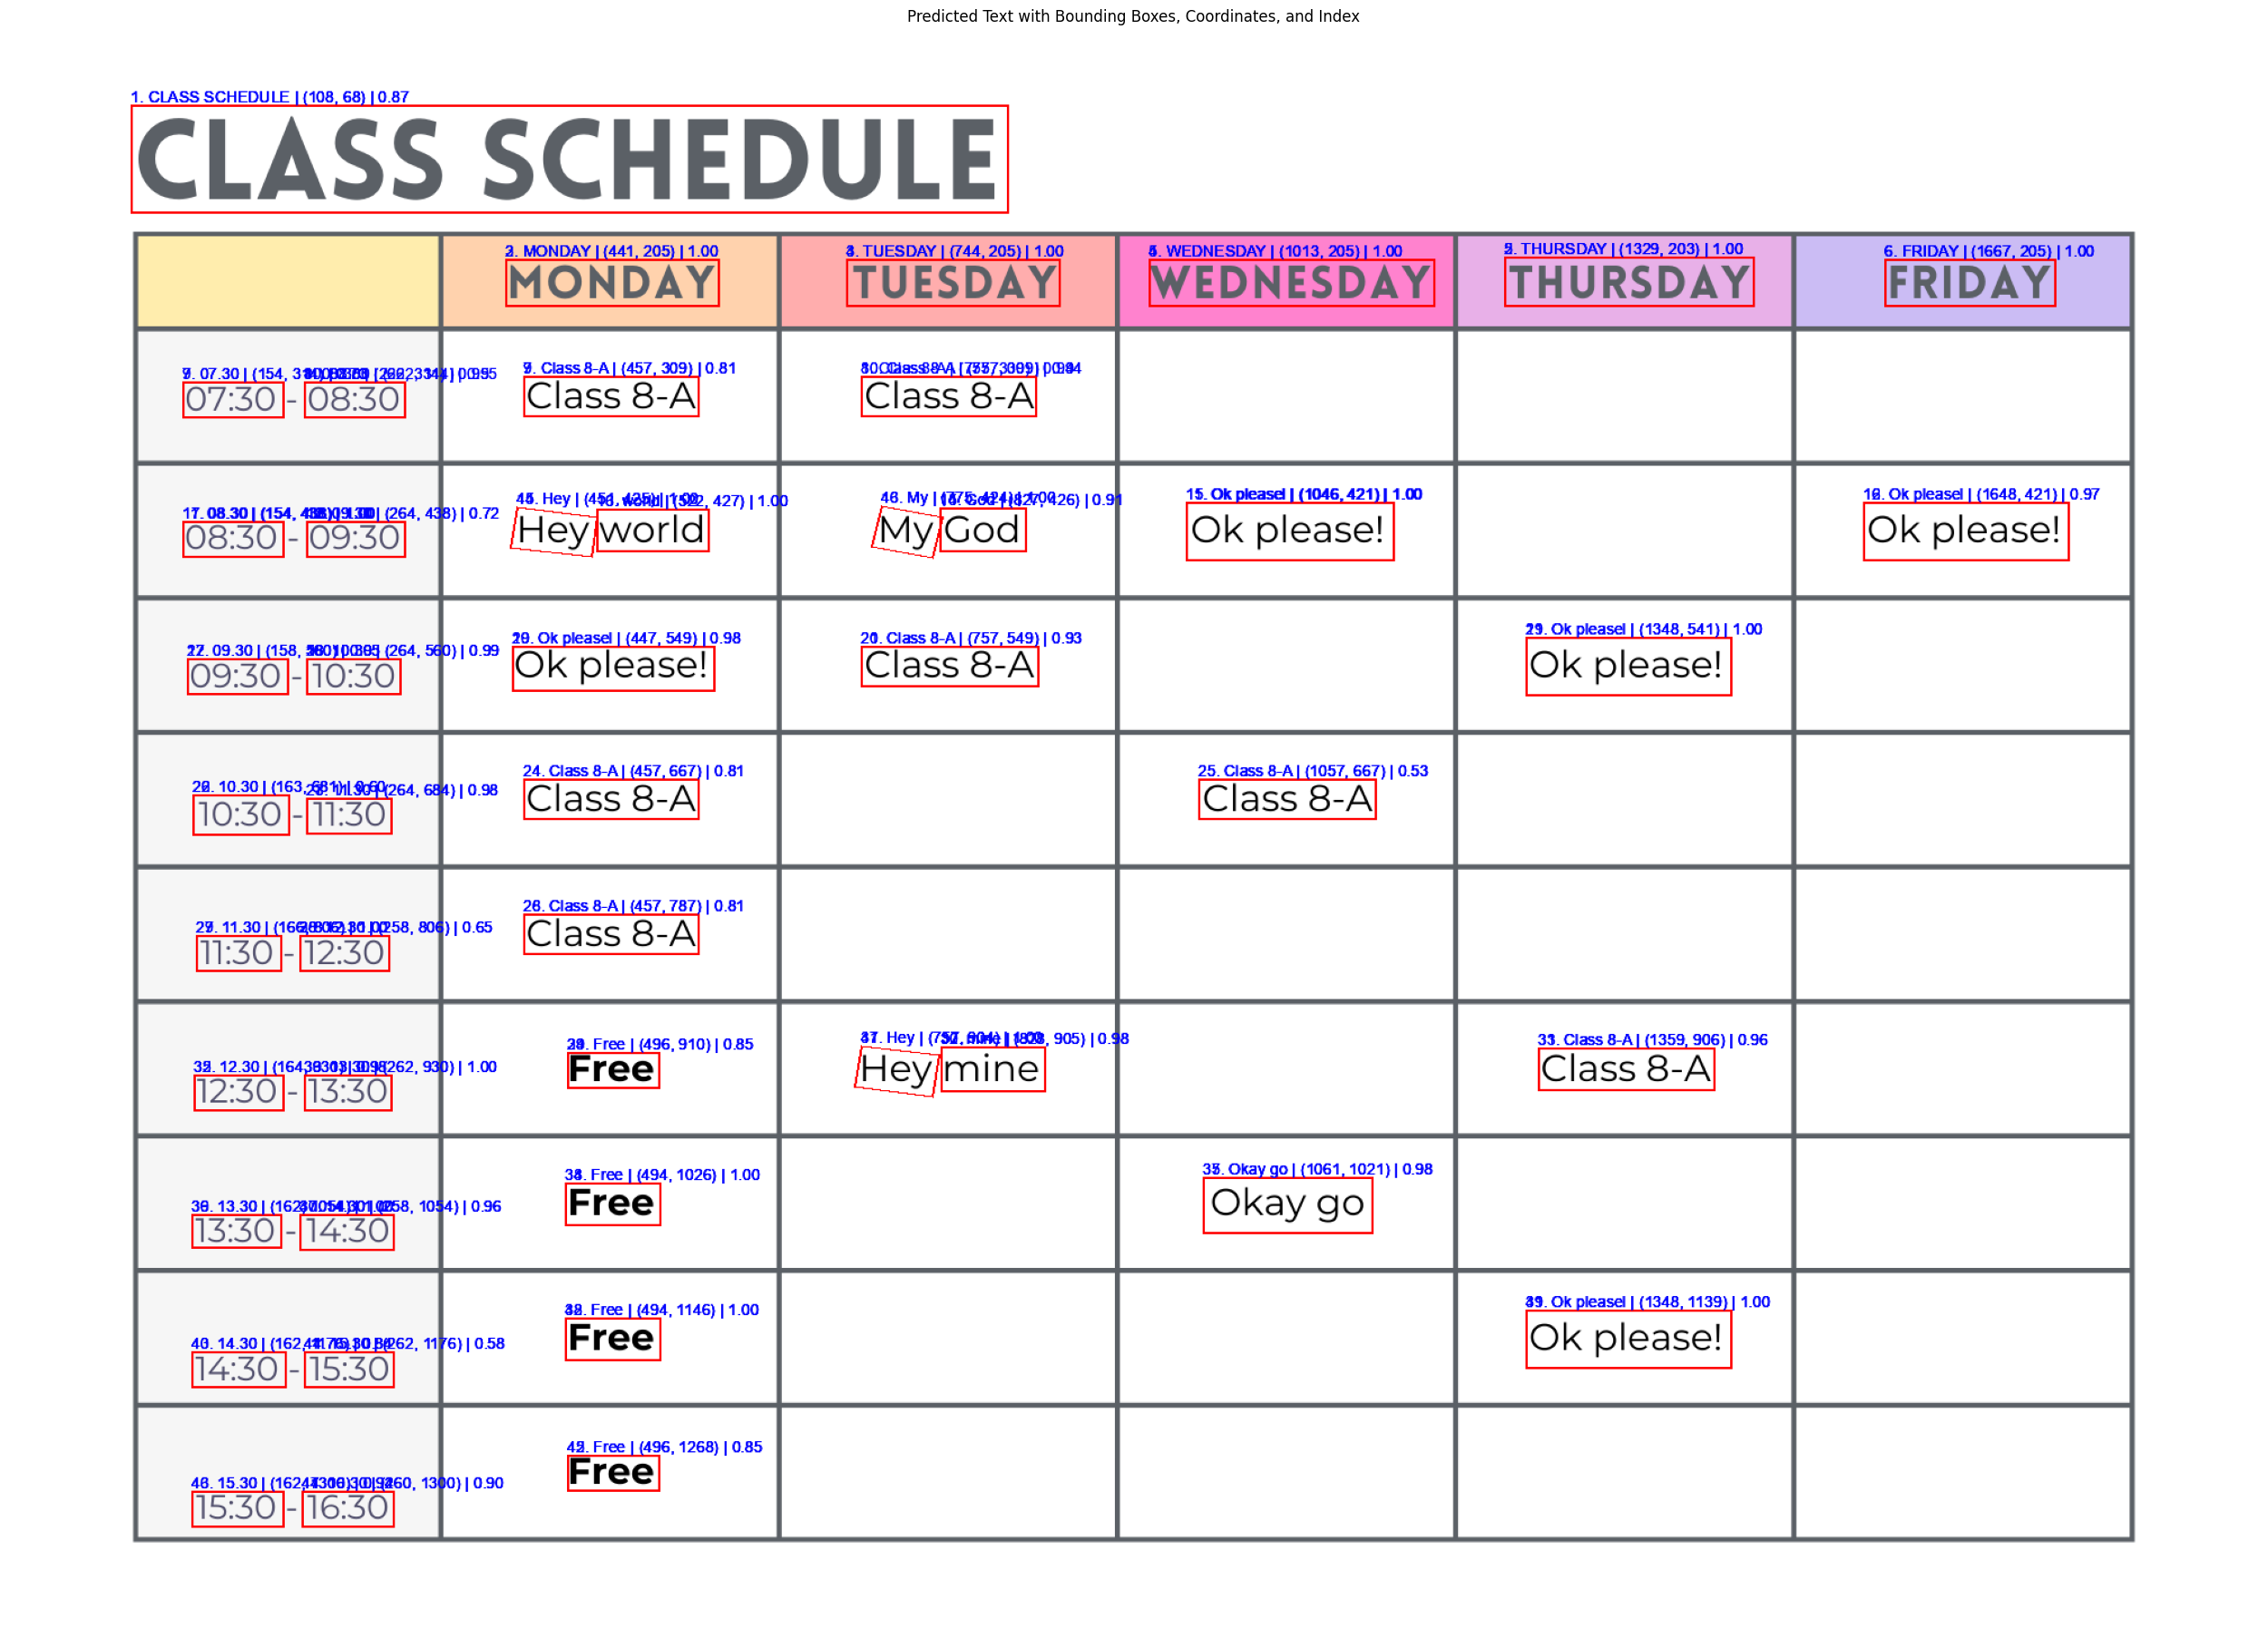

In [41]:
for idx, (bbox, text, prob) in enumerate(results, start=1):
    # Draw bounding box
    pts = [tuple(point) for point in bbox]
    draw.polygon(pts, outline='red', width=2)
    
    # Prepare annotation
    top_left = tuple(map(int, pts[0]))
    annotation = f"{idx}. {text} | {top_left} | {prob:.2f}"

    # Draw text
    draw.text((top_left[0], top_left[1] - 15), annotation, fill='blue', font=font)

# Show image using matplotlib
plt.figure(figsize=(32, 32))
plt.imshow(img_pil)
plt.axis('off')
plt.title('Predicted Text with Bounding Boxes, Coordinates, and Index')
plt.show()

In [64]:
text_entries = []
for (bbox, text, prob) in results:
    x_coords=[point[0] for point in bbox]
    y_coords=[point[1] for point in bbox]
    startX,endX,startY,endY=int(min(x_coords)),int(max(x_coords)),int(min(y_coords)),int(max(y_coords))
    print("Text:", text)
    print(f"x(or width) spans from {startX} to {endX}")
    print(f"y (or height) spans from {startY} to {endY}")
    print(),print()
    
    text_entries.append((startX, startY,endY ,text))
    # text_entries.append((int(top_left[0]), int(top_left[1]), text))

Text: CLASS SCHEDULE
x(or width) spans from 108 to 888
y (or height) spans from 68 to 164


Text: THURSDAY
x(or width) spans from 1329 to 1551
y (or height) spans from 203 to 247


Text: MONDAY
x(or width) spans from 441 to 631
y (or height) spans from 205 to 247


Text: TUESDAY
x(or width) spans from 744 to 934
y (or height) spans from 205 to 247


Text: WEDNESDAY
x(or width) spans from 1013 to 1267
y (or height) spans from 205 to 247


Text: FRIDAY
x(or width) spans from 1667 to 1819
y (or height) spans from 205 to 247


Text: Class 8-A
x(or width) spans from 457 to 613
y (or height) spans from 309 to 345


Text: Class 8-A
x(or width) spans from 757 to 913
y (or height) spans from 309 to 345


Text: 07.30
x(or width) spans from 154 to 244
y (or height) spans from 314 to 346


Text: 08.30
x(or width) spans from 262 to 352
y (or height) spans from 314 to 346


Text: Ok pleasel
x(or width) spans from 1046 to 1231
y (or height) spans from 421 to 473


Text: Ok pleasel
x(or width) spans f

In [65]:
for res in text_entries:
    print(res)

(108, 68, 164, 'CLASS SCHEDULE')
(1329, 203, 247, 'THURSDAY')
(441, 205, 247, 'MONDAY')
(744, 205, 247, 'TUESDAY')
(1013, 205, 247, 'WEDNESDAY')
(1667, 205, 247, 'FRIDAY')
(457, 309, 345, 'Class 8-A')
(757, 309, 345, 'Class 8-A')
(154, 314, 346, '07.30')
(262, 314, 346, '08.30')
(1046, 421, 473, 'Ok pleasel')
(1648, 421, 473, 'Ok pleasel')
(766, 424, 471, 'My')
(445, 425, 470, 'Hey')
(827, 426, 465, 'God')
(522, 427, 465, 'world')
(154, 438, 470, '08.30')
(264, 438, 470, '09.30')
(1348, 541, 593, 'Ok pleasel')
(447, 549, 589, 'Ok pleasel')
(757, 549, 585, 'Class 8-A')
(158, 560, 592, '09.30')
(264, 560, 592, '10.30')
(457, 667, 703, 'Class 8-A')
(1057, 667, 703, 'Class 8-A')
(163, 681, 717, '10.30')
(264, 684, 716, '11.30')
(457, 787, 823, 'Class 8-A')
(166, 806, 838, '11.30')
(258, 806, 838, '12.30')
(751, 904, 950, 'Hey')
(828, 905, 945, 'mine')
(1359, 906, 944, 'Class 8-A')
(496, 910, 942, 'Free')
(164, 930, 962, '12.30')
(262, 930, 962, '13.30')
(1061, 1021, 1071, 'Okay go')
(494, 

In [71]:
rows = []

for entry in text_entries:
    x, startY, endY, text = entry
    placed = False

    for row in rows:
        '''
        For each piece of text I am traversing it will:
        a. Traverse entire row I have till now
        b. Find out the coordinates of text already there
        c. Check whether the new text entry falls in +-20 of that coordinate
        d. If yes append to current row
        e. If no create a new row and append there
        '''
        _, ref_startY, ref_endY, _ = row[0]
        if (ref_startY - 20) <= startY <= (ref_endY + 20):
            row.append(entry)
            placed = True
            break
    # if no row found create a now row
    if not placed:
        rows.append([entry])

'''
x[0] refers to the first element in list which is the startX
- so this will sort left to right each row element
'''
for row in rows:
    row.sort(key=lambda x: x[0])  
'''
This part sort all rows by y
'''
rows.sort(key=lambda row: min(e[1] for e in row)) 

In [72]:
print("\n✅ Final Timetable Rows (Dynamic Y Range Matching):\n")
for i, row in enumerate(rows, start=1):
    row_text = [text for (_, _, _, text) in row]
    print(f"Row {i}: {'  |  '.join(row_text)}")


✅ Final Timetable Rows (Dynamic Y Range Matching):

Row 1: CLASS SCHEDULE
Row 2: MONDAY  |  TUESDAY  |  WEDNESDAY  |  THURSDAY  |  FRIDAY
Row 3: 07.30  |  08.30  |  Class 8-A  |  Class 8-A
Row 4: 08.30  |  09.30  |  Hey  |  world  |  My  |  God  |  Ok pleasel  |  Ok pleasel
Row 5: 09.30  |  10.30  |  Ok pleasel  |  Class 8-A  |  Ok pleasel
Row 6: 10.30  |  11.30  |  Class 8-A  |  Class 8-A
Row 7: 11.30  |  12.30  |  Class 8-A
Row 8: 12.30  |  13.30  |  Free  |  Hey  |  mine  |  Class 8-A
Row 9: 13.30  |  14.30  |  Free  |  Okay go
Row 10: 14.30  |  15.30  |  Free  |  Ok pleasel
Row 11: 15.30  |  16.30  |  Free


In [53]:
text_entries.sort(key=lambda x: x[1])

In [54]:
for res in text_entries:
    print(res)

(108, 68, 'CLASS SCHEDULE')
(1329, 203, 'THURSDAY')
(441, 205, 'MONDAY')
(744, 205, 'TUESDAY')
(1013, 205, 'WEDNESDAY')
(1667, 205, 'FRIDAY')
(457, 309, 'Class 8-A')
(757, 309, 'Class 8-A')
(154, 314, '07.30')
(262, 314, '08.30')
(1046, 421, 'Ok pleasel')
(1648, 421, 'Ok pleasel')
(775, 424, 'My')
(451, 425, 'Hey')
(827, 426, 'God')
(522, 427, 'world')
(154, 438, '08.30')
(264, 438, '09.30')
(1348, 541, 'Ok pleasel')
(447, 549, 'Ok pleasel')
(757, 549, 'Class 8-A')
(158, 560, '09.30')
(264, 560, '10.30')
(457, 667, 'Class 8-A')
(1057, 667, 'Class 8-A')
(163, 681, '10.30')
(264, 684, '11.30')
(457, 787, 'Class 8-A')
(166, 806, '11.30')
(258, 806, '12.30')
(757, 904, 'Hey')
(828, 905, 'mine')
(1359, 906, 'Class 8-A')
(496, 910, 'Free')
(164, 930, '12.30')
(262, 930, '13.30')
(1061, 1021, 'Okay go')
(494, 1026, 'Free')
(162, 1054, '13.30')
(258, 1054, '14.30')
(1348, 1139, 'Ok pleasel')
(494, 1146, 'Free')
(162, 1176, '14.30')
(262, 1176, '15.30')
(496, 1268, 'Free')
(162, 1300, '15.30')


In [47]:
rows = []
current_row = []
y_threshold = 15

for i, entry in enumerate(text_entries):
    x, y, text = entry
    if not current_row:
        current_row.append(entry)
    else:
        prev_y = current_row[-1][1]
        if abs(y - prev_y) <= y_threshold:
            current_row.append(entry)
        else:
            rows.append(current_row)
            current_row = [entry]

In [48]:
if current_row:
    rows.append(current_row)

# Step 3: Sort each row by x (left to right)
for i in range(len(rows)):
    rows[i].sort(key=lambda x: x[0])

# Step 4: Extract just text per row
json_rows = [[text for x, y, text in row] for row in rows]

In [49]:
import json


In [50]:
timetable_json = {"rows": json_rows}
print(json.dumps(timetable_json, indent=2))

{
  "rows": [
    [
      "CLASS SCHEDULE"
    ],
    [
      "MONDAY",
      "TUESDAY",
      "WEDNESDAY",
      "THURSDAY",
      "FRIDAY"
    ],
    [
      "07.30",
      "08.30",
      "Class 8-A",
      "Class 8-A"
    ],
    [
      "08.30",
      "09.30",
      "Hey",
      "world",
      "My",
      "God",
      "Ok pleasel",
      "Ok pleasel"
    ],
    [
      "09.30",
      "10.30",
      "Ok pleasel",
      "Class 8-A",
      "Ok pleasel"
    ],
    [
      "10.30",
      "11.30",
      "Class 8-A",
      "Class 8-A"
    ],
    [
      "Class 8-A"
    ],
    [
      "11.30",
      "12.30"
    ],
    [
      "Free",
      "Hey",
      "mine",
      "Class 8-A"
    ],
    [
      "12.30",
      "13.30"
    ],
    [
      "Free",
      "Okay go"
    ],
    [
      "13.30",
      "14.30"
    ],
    [
      "Free",
      "Ok pleasel"
    ],
    [
      "14.30",
      "15.30"
    ],
    [
      "Free"
    ],
    [
      "15.30",
      "16.30"
    ]
  ]
}
